In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

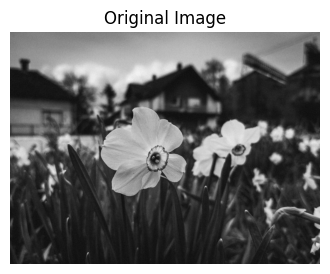

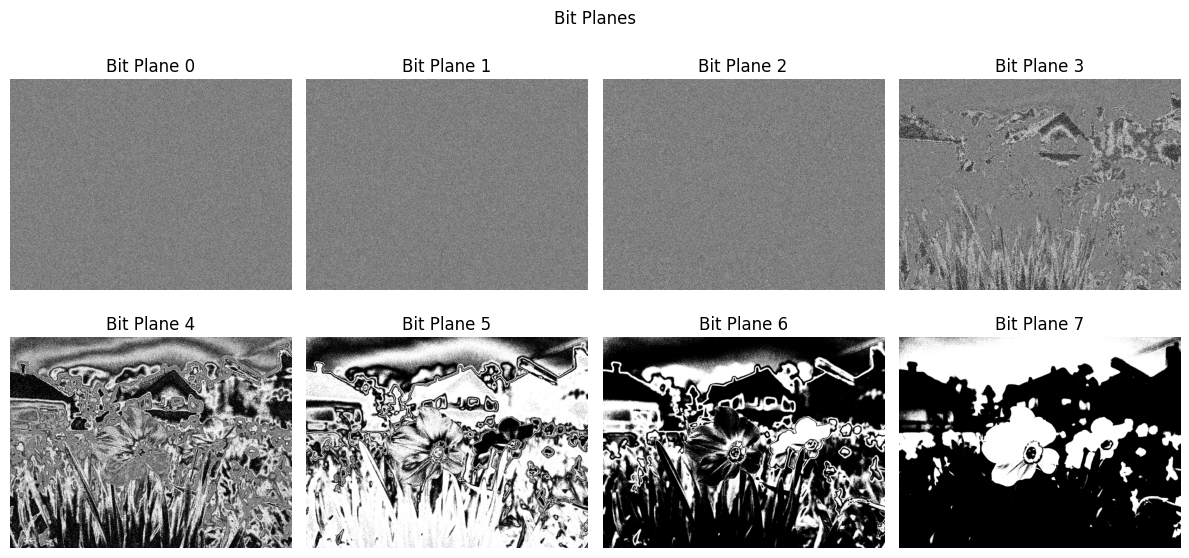

Bit plane values (top-left 8x8 region):
Bit Plane 0:
1 0 1 1 0 0 0 1
0 0 1 1 1 0 0 1
1 0 1 1 1 0 0 0
1 0 0 0 0 1 0 1
0 1 1 1 1 0 0 1
0 0 0 0 1 0 0 1
1 1 0 0 0 1 0 1
1 0 0 1 1 0 1 0

Bit Plane 1:
0 0 1 1 1 0 0 0
1 1 0 1 0 1 0 1
0 1 1 1 0 1 0 0
1 1 0 1 1 0 0 1
0 1 1 0 0 0 1 1
0 0 1 0 0 1 1 1
1 0 0 1 0 0 1 1
0 1 1 0 1 0 0 0

Bit Plane 2:
1 0 1 1 0 1 0 1
1 0 0 0 0 0 1 1
1 1 0 0 1 1 1 0
1 1 1 0 1 1 1 1
0 1 0 1 1 1 0 0
1 1 1 0 0 1 0 0
0 1 0 1 0 0 0 1
1 1 0 0 1 0 1 0

Bit Plane 3:
1 0 0 1 0 0 0 0
1 0 1 0 0 1 0 0
1 1 0 1 1 1 0 1
0 0 1 0 1 1 0 1
1 0 1 0 0 1 0 1
0 1 1 0 0 1 1 1
0 1 1 1 1 0 0 1
1 1 1 0 0 0 1 0

Bit Plane 4:
0 1 1 1 0 0 0 1
0 1 1 0 0 1 1 1
1 1 0 1 0 0 1 1
1 1 1 1 0 1 0 1
1 1 1 1 1 1 0 1
1 1 1 1 1 0 1 1
1 1 1 0 1 1 1 1
0 1 1 1 1 0 0 1

Bit Plane 5:
1 1 1 1 0 0 0 1
1 1 1 0 0 1 1 1
1 1 0 1 1 1 1 1
1 1 1 1 1 1 0 1
1 1 1 1 1 1 0 1
1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1
1 1 1 1 1 0 1 1

Bit Plane 6:
1 1 1 1 0 0 0 1
1 1 1 0 0 1 1 1
1 1 0 1 1 1 1 1
1 1 1 1 1 1 0 1
1 1 1 1 1 1 0 1
1 1 1 1 1 1 1 1

In [3]:
def bit_plane_slicing(image, num_bits=8):
    bit_planes = [np.zeros(image.shape, dtype=np.uint8) for _ in range(num_bits)]
    for i in range(num_bits):
        bit_value = 2 ** i
        bit_planes[i] = (image & bit_value) >> i
    return bit_planes


img_path = 'sample.jpg'  
img = Image.open(img_path).convert('L')
image = np.array(img)

num_bits = 8
bit_planes = bit_plane_slicing(image, num_bits)

# original image
plt.figure(figsize=(4,4))
plt.title('Original Image')
plt.axis('off')
plt.imshow(image, cmap='gray')
plt.show()

# Visualize all bit planes
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
fig.suptitle('Bit Planes')
for i in range(num_bits):
    ax = axes[i//4, i%4]
    ax.imshow(bit_planes[i]*255, cmap='gray')
    ax.set_title(f'Bit Plane {i}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# Print bit planes as 1-bit values for a small region (top-left 8x8 for example)
print('Bit plane values (top-left 8x8 region):')
for i in range(num_bits):
    print(f'Bit Plane {i}:')
    for row in bit_planes[i][:8]:
        print(' '.join(str(val) for val in row[:8]))
    print()